In [ ]:
# Use this part only if you're using Google Colab
# Initializing the Colaboratory 
from google.colab import drive
import os

drive.mount('/content/drive') # mount Google drive
os.chdir('/content/drive/MyDrive/your_file')  #change to working directory

Mounted at /content/drive


The code bellow is a function that reduces or increases the spatial resolution of an image by a factor n, given by the user. To peform the interpolation, it was used the bilinear method. 

To ilustrate this, the image was reduced by a factor of 2, 4, 8 e 16 and then increased by the same factors.

The PSNR - peak-signal-to-noise-ratio betwen the images was calculated.

In [ ]:
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow #if you're using Google Colab
import time

In [ ]:
def calculate_psnr(img1, img2):
    # img1 and img2 have range [0, 255]
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    mse = np.mean((img1 - img2)**2)
    if mse == 0:
        return 0
    return 20 * math.log10(255.0 / math.sqrt(mse))

In [ ]:
t0 = time.time()

#Increases or reduces the dimensions using bilinear method
def resizing_bi():
  #Open image
  image_to_use = 'lennaCinza.png'
  image_base = cv2.imread(image_to_use, 0)
  height, width = image_base.shape

  n = []

  #Asks the user to define the scale factor
  while True:
    factor = input('Enter the factor: ')
    if factor == '0':
      factor = input('Number invalid. Enter the factor: ')
    try:
      n.append(int(factor))
    #Press any button to quit
    except ValueError:
      break
  
  PSNR = np.zeros(shape=(len(n)))

  for k in range(len(n)):
    if n[k] > 0:
      #New shape
      new_height, new_width = (height*n[k]), (width*n[k])
      #Creat an array for the new image
      new_image = np.zeros(shape=(new_height, new_width))
      #Add 0s on edges to calculate the method
      base_matrix = np.zeros(shape=(new_height+2, new_width+2))
      back_base_matrix = np.zeros(shape=(new_height+2, new_width+2))
      back_image = np.zeros(shape=(height, width))
      op = 0
    else:
      #Same thing done above but for decrase factors
      new_height, new_width = int(height/abs(n[k])), int(width/abs(n[k]))
      new_image = np.zeros(shape=(new_height, new_width))
      base_matrix = np.zeros(shape=(height+2, width+2))
      back_base_matrix = np.zeros(shape=(height+2, width+2))
      back_image = np.zeros(shape=(height, width))
      op = 1

    if op == 0:
      for i in range(height):
        for j in range(width):
          #Place the original pixels spaced by the scale factor
          base_matrix[(1+i*n[k]) : (1+i*n[k] + n[k]), (1+j*n[k]) : (1+j*n[k]+n[k])] = image_base[i][j]
      
      for i in range(new_height):
        for j in range(new_width):
          #Apply the method
          new_image[i][j] = (base_matrix[i][j]+base_matrix[i][j+1]+base_matrix[i+1][j]+base_matrix[i+1][j+1])/4
      
      back_base_matrix[1 : new_height+1, 1: new_width+1] = new_image
      for i in range(height):
        for j in range(width):
          #Bring the image back to the original shape
          back_image[i][j] = (back_base_matrix[i*abs(n[k])][j*abs(n[k])]+back_base_matrix[i*abs(n[k])][abs(n[k])*j+1]+back_base_matrix[abs(n[k])*i+1][j*abs(n[k])]+back_base_matrix[abs(n[k])*i+1][abs(n[k])*j+1])/4

    else:
      base_matrix[1 : height+1, 1: width+1] = image_base
      for i in range(new_height):
        for j in range(new_width):
          new_image[i][j] = (base_matrix[i*abs(n[k])][j*abs(n[k])]+base_matrix[i*abs(n[k])][abs(n[k])*j+1]+base_matrix[abs(n[k])*i+1][j*abs(n[k])]+base_matrix[abs(n[k])*i+1][abs(n[k])*j+1])/4
      
      for i in range(new_height):
        for j in range(new_width):
          back_base_matrix[(1+i*abs(n[k])) : (1+i*abs(n[k]) + abs(n[k])), (1+j*abs(n[k])) : (1+j*abs(n[k])+abs(n[k]))] = new_image[i][j]
      
      for i in range(height):
        for j in range(width):
          back_image[i][j] = (back_base_matrix[i][j]+back_base_matrix[i][j+1]+back_base_matrix[i+1][j]+back_base_matrix[i+1][j+1])/4
    
    PSNR[k] = calculate_psnr(image_base, back_image)

    plt.figure(figsize=(20, 100))

    plt.subplot((len(n)+1), 3, (3*k+1))
    plt.imshow(image_base, cmap='gray') 
    plt.title("Original Image")

    plt.subplot((len(n)+1), 3, (3*k+2)) 
    plt.imshow(new_image, cmap='gray') 
    plt.title("Resized Image factor = " + str(n[k]))

    plt.subplot((len(n)+1), 3, (3*k+3)) 
    plt.imshow(back_image, cmap='gray') 
    plt.title("Resized Image factor = " + str(n[k]))

  plt.figure(figsize = (18,8))
  plt.plot(sorted(n, key = int), PSNR)
  plt.xlabel('Fator')
  plt.ylabel('PSNR')
  plt.grid()
  plt.title('Relação Sinal Ruído com Interporlação Bilinear')
  plt.show()   

  return t0


Enter the factor: -2
Enter the factor: -4
Enter the factor: -8
Enter the factor: -16
Enter the factor: 2
Enter the factor: 4
Enter the factor: 8
Enter the factor: 16
Enter the factor: s


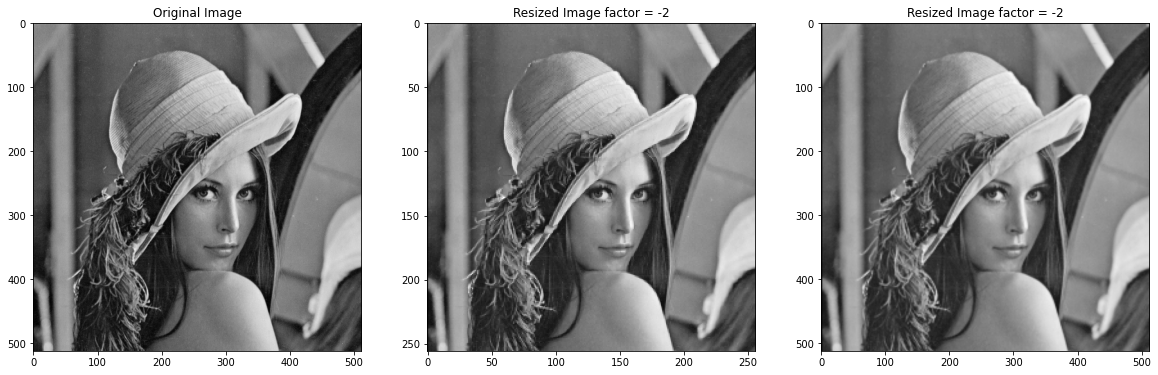

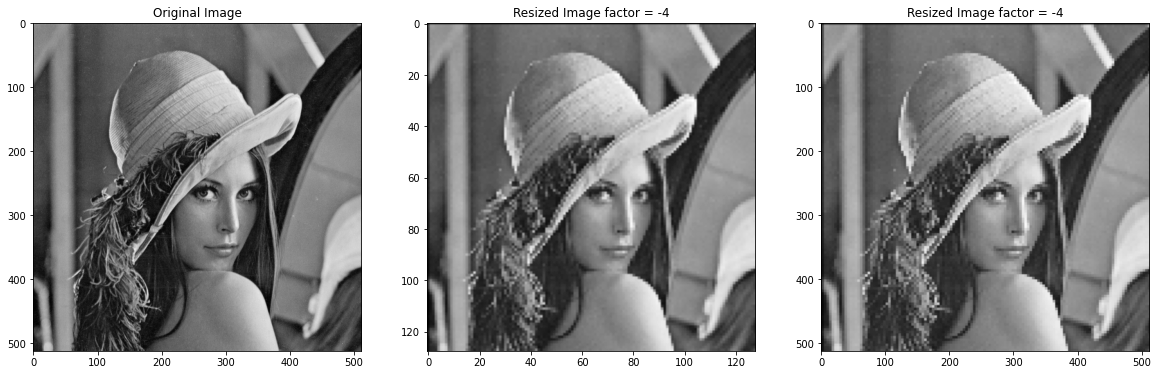

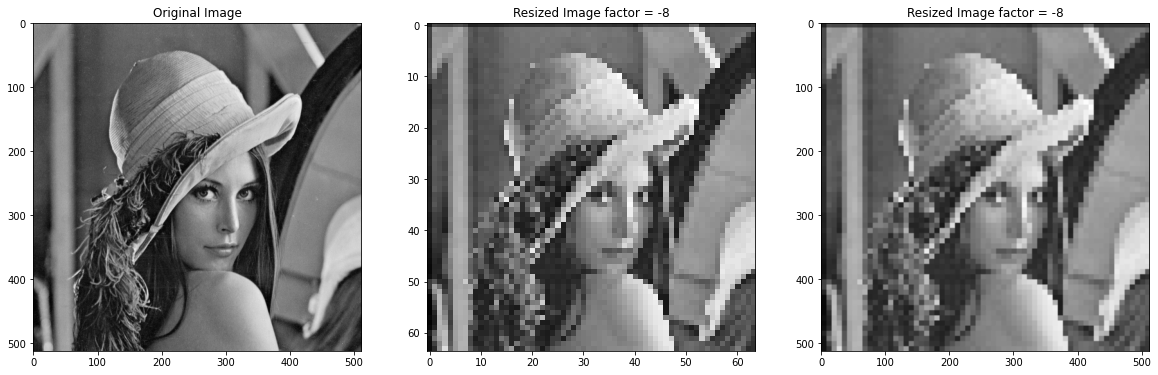

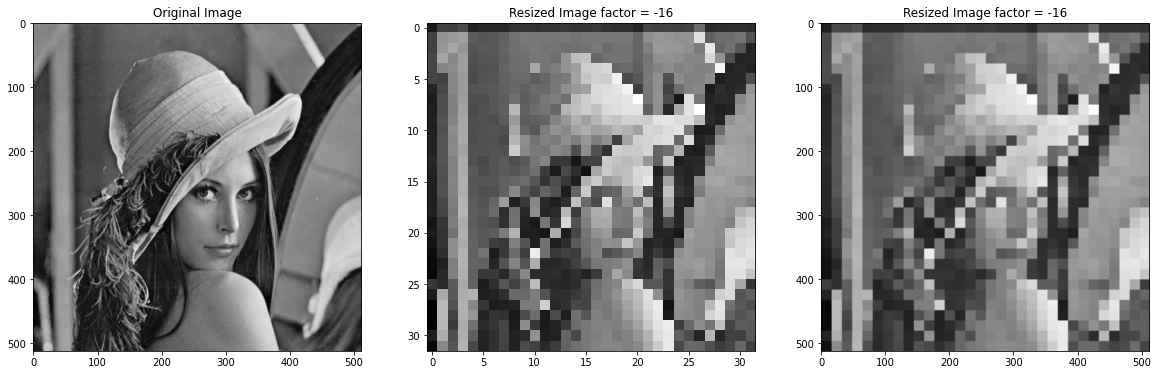

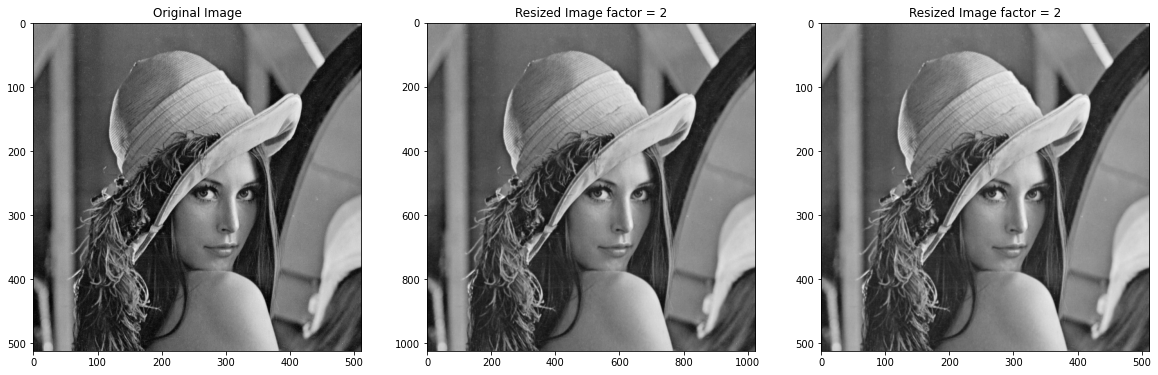

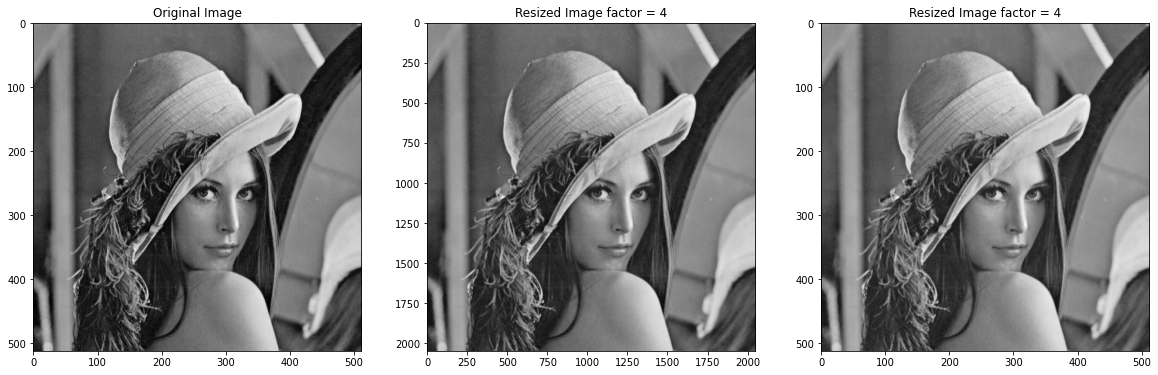

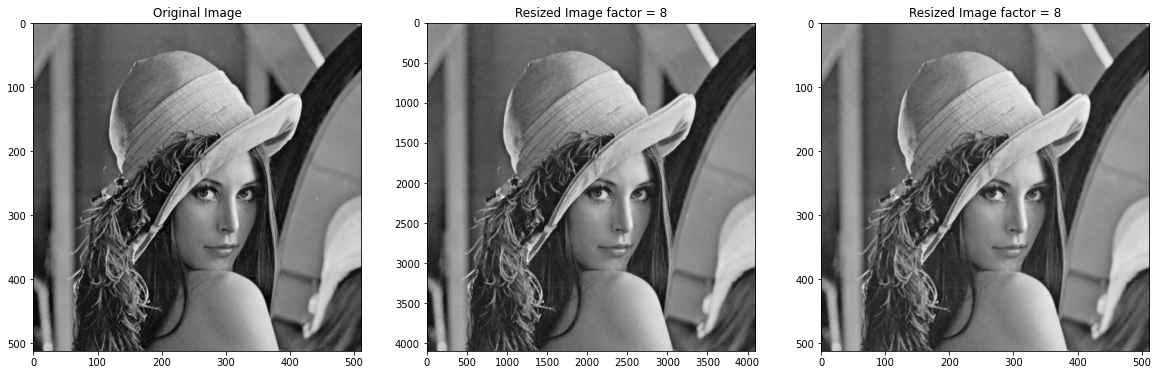

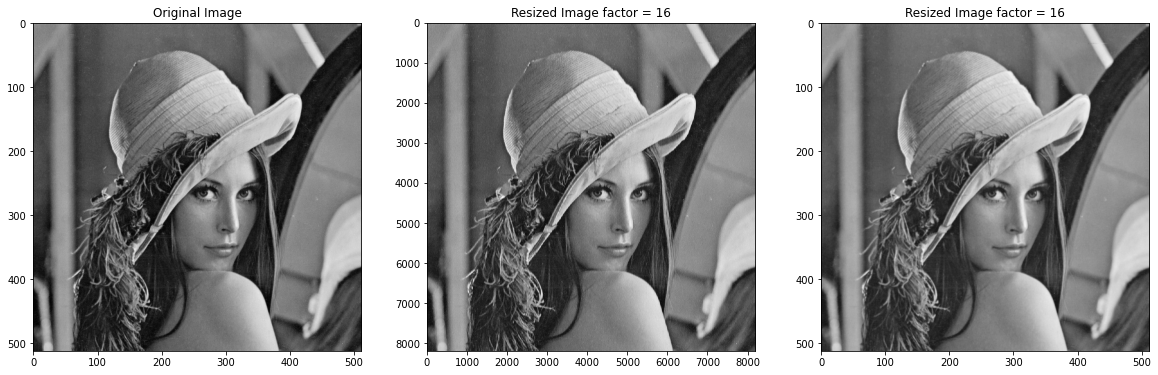

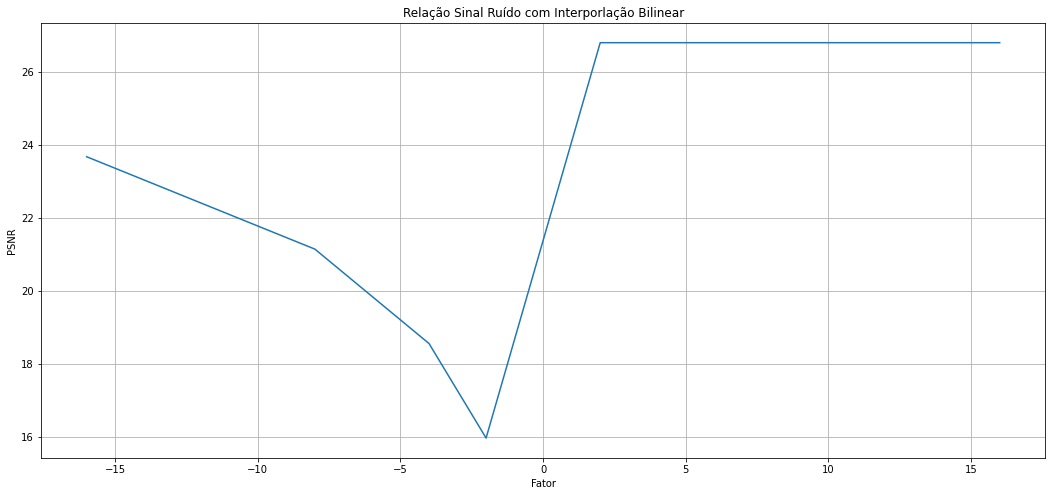

In [ ]:
t0_bi = resizing_bi()

Now it is done the same thing above but using OpenCV function resize.

In [ ]:
t1 = time.time()

def resizing_cv_bi():
  image_to_use = 'lennaCinza.png'
  image_base = cv2.imread(image_to_use, 0)
  height, width = image_base.shape

  n = []

  while True:
    factor = input('Enter the factor: ')
    if factor == '0':
      factor = input('Number invalid. Enter the factor: ')
    try:
      n.append(int(factor))
    except ValueError:
      break
  
  PSNR = np.zeros(shape=(len(n)))

  for k in range(len(n)):
    if n[k] > 0:
      new_image = cv2.resize(image_base, (width*n[k], height*n[k]), interpolation=cv2.INTER_LINEAR)
      back_image = cv2.resize(new_image, (width, height), interpolation=cv2.INTER_LINEAR)
    else:
      new_image = cv2.resize(image_base, (int(width/abs(n[k])), int(height/abs(n[k]))), interpolation=cv2.INTER_LINEAR)
      back_image = cv2.resize(new_image, (width, height), interpolation=cv2.INTER_LINEAR)

    PSNR[k] = calculate_psnr(image_base, back_image)

    plt.figure(figsize=(20, 100))

    plt.subplot((len(n)+1), 3, (3*k+1))
    plt.imshow(image_base, cmap='gray') 
    plt.title("Original Image")

    plt.subplot((len(n)+1), 3, (3*k+2)) 
    plt.imshow(new_image, cmap='gray') 
    plt.title("Resized Image factor = " + str(n[k]))

    plt.subplot((len(n)+1), 3, (3*k+3)) 
    plt.imshow(back_image, cmap='gray') 
    plt.title("Resized Image factor = " + str(n[k]))

  plt.figure(figsize = (18,8))
  plt.plot(sorted(n, key = int), PSNR)
  plt.xlabel('Fator')
  plt.ylabel('PSNR')
  plt.grid()
  plt.title('Relação Sinal Ruído com Interporlação Bilinear Utilizando OpenCV')
  plt.show()

  return t1

Enter the factor: -2
Enter the factor: -4
Enter the factor: -8
Enter the factor: -16
Enter the factor: 2
Enter the factor: 4
Enter the factor: 8
Enter the factor: 16
Enter the factor: s


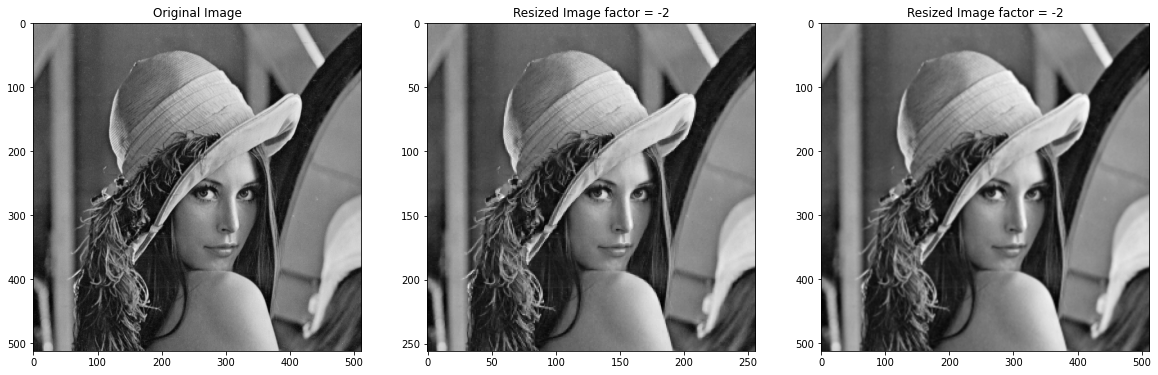

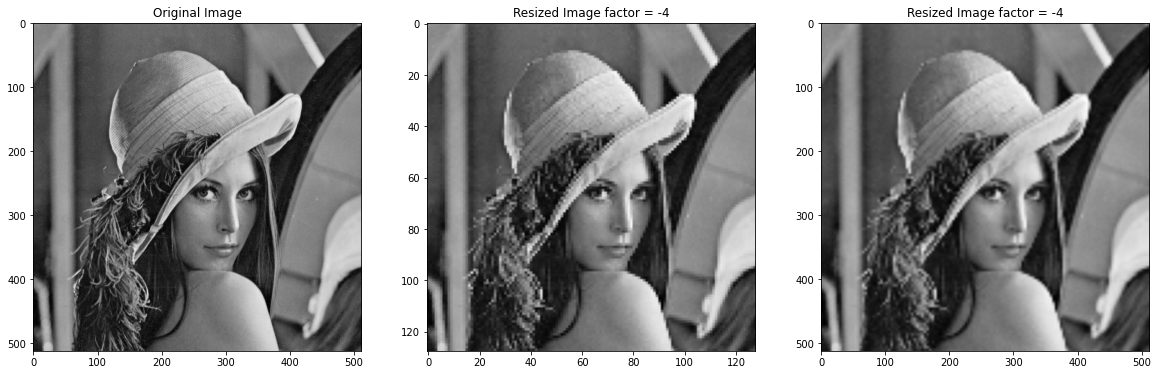

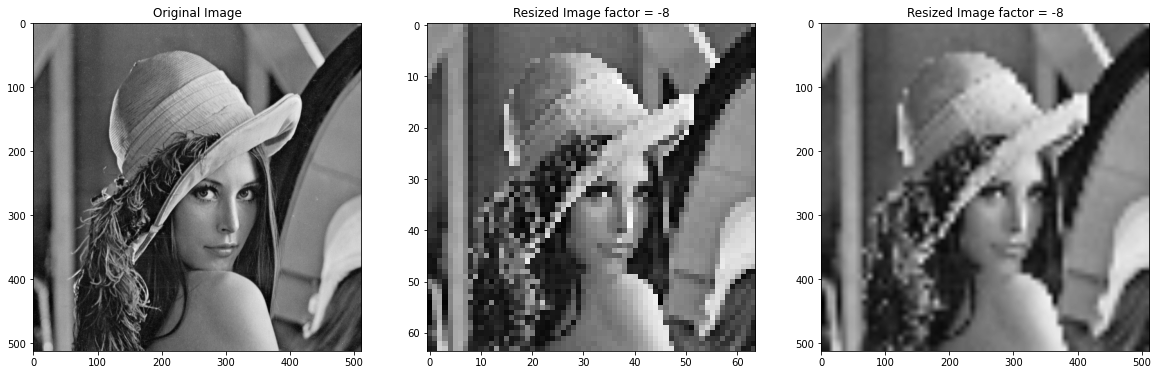

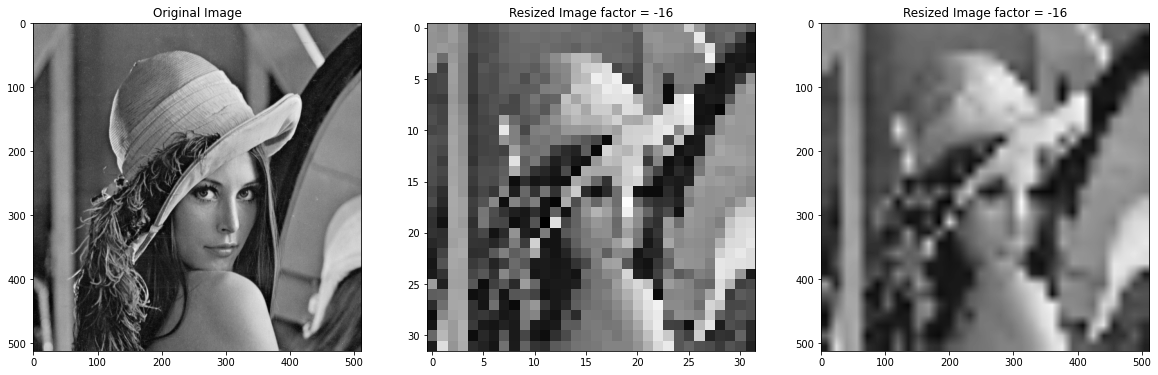

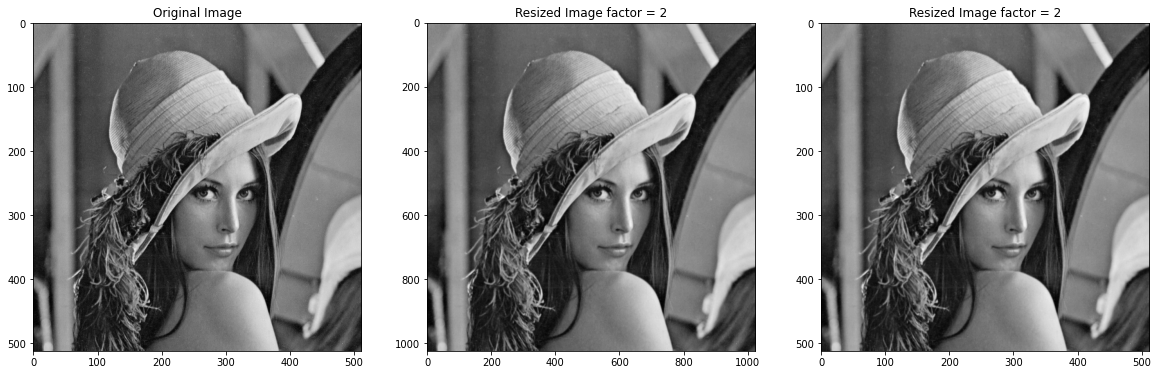

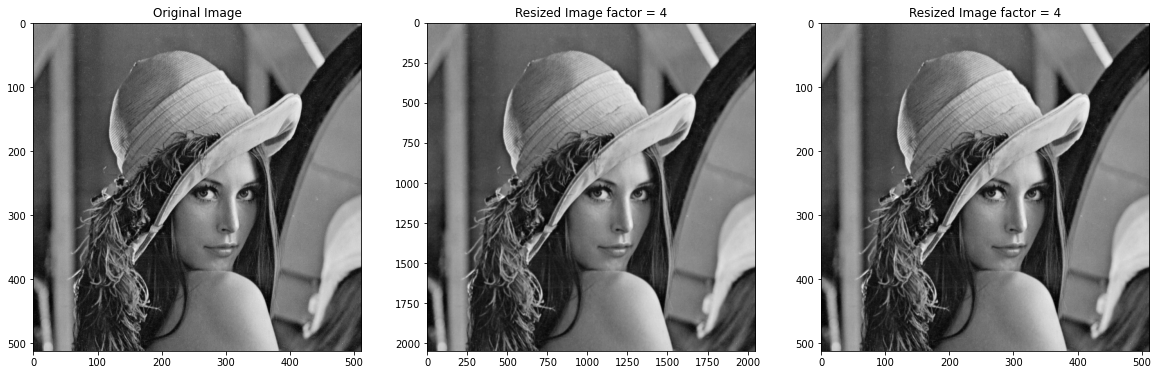

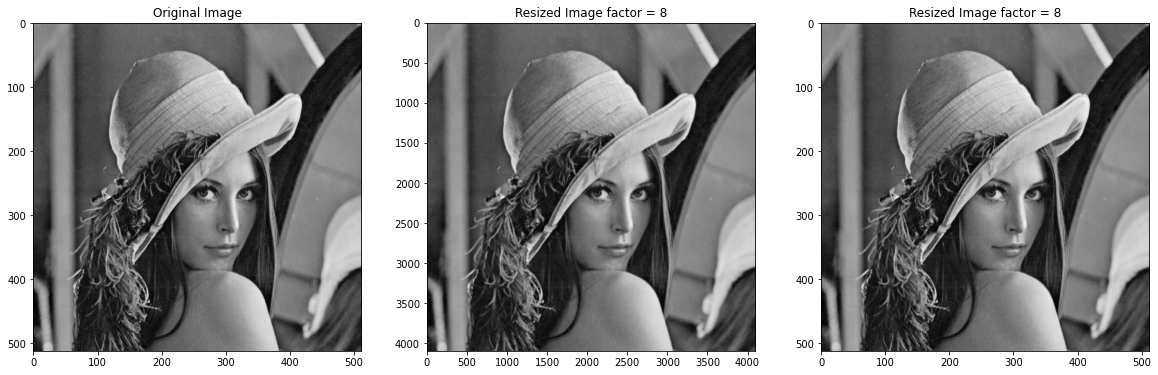

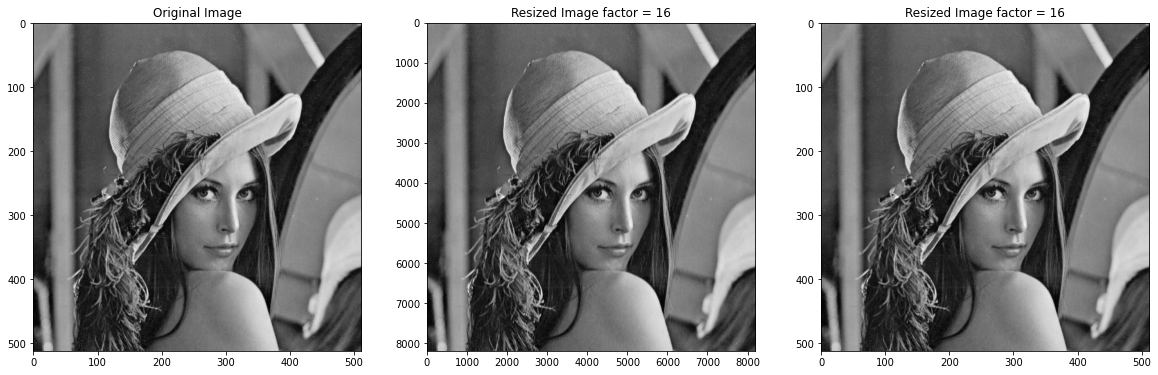

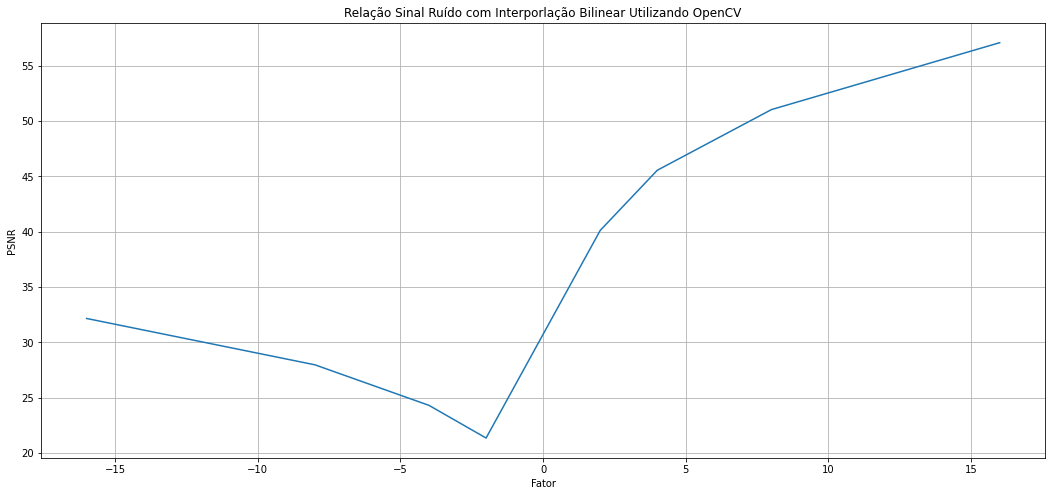

In [ ]:
t1_bi = resizing_cv_bi()